In [ ]:
# Import necessary libraries
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'updated_with_busy_level_categories.csv'  # Replace this with your file path
data = pd.read_csv(file_path)

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Filter to display columns with missing values, if any
missing_columns = missing_values[missing_values > 0]
missing_columns

,0
Tone_Preference,18
Detail_Preference,18
Feedback,198


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Categorize Age into bins
data['Age_Category'] = pd.cut(
    data['Age'],
    bins=[18, 35, 55, 100],  # Age in years
    labels=['18-34', '35-54', '55+'],
    right=False
)

# Quartile-based binning for ordinal features (original values)
ordinal_features = ['Driving_Style', 'Trust_on_AV', 'Driving_Experience', 'Risk', 'Aggressive']
for feature in ordinal_features:
    data[f'{feature}_Category'] = pd.qcut(
        data[feature],
        q=3,  # Divide into 3 groups
        labels=['Low', 'Medium', 'High']
    )

# K-means clustering for Busy_Level_1
kmeans = KMeans(n_clusters=3, random_state=42)
data['Busy_Level_Category'] = kmeans.fit_predict(data[['Busy_Level_1']])

# Relabel K-means clusters for interpretability
cluster_labels = {0: 'Low', 1: 'Medium', 2: 'High'}
data['Busy_Level_Category'] = data['Busy_Level_Category'].replace(cluster_labels)

# Verify categorized features
print(data[['Age', 'Age_Category', 'Driving_Style', 'Driving_Style_Category',
            'Trust_on_AV', 'Trust_on_AV_Category',
            'Driving_Experience', 'Driving_Experience_Category',
            'Risk_Category', 'Aggressive_Category',
            'Busy_Level_1', 'Busy_Level_Category']].head())


   Age Age_Category  Driving_Style Driving_Style_Category  Trust_on_AV  \
0   45        35-54       2.416667                   High     2.166667   
1   45        35-54       2.416667                   High     2.166667   
2   45        35-54       2.416667                   High     2.166667   
3   45        35-54       2.416667                   High     2.166667   
4   45        35-54       2.416667                   High     2.166667   

  Trust_on_AV_Category  Driving_Experience Driving_Experience_Category  \
0                  Low                   2                         Low   
1                  Low                   2                         Low   
2                  Low                   2                         Low   
3                  Low                   2                         Low   
4                  Low                   2                         Low   

  Risk_Category Aggressive_Category  Busy_Level_1 Busy_Level_Category  
0        Medium                 Low   

In [ ]:
# List of dependent variables to transform into binary values
dependent_variables = ['Useful_Highlight', 'Useful_Icon', 'Useful_Audio', 'Need']

# Convert values >= 4 to 1 and values < 4 to 0
data[dependent_variables] = data[dependent_variables].applymap(lambda x: 1 if x >= 4 else 0)

# Display the first few rows of the transformed dependent variables
data[dependent_variables].head(30)

<ipython-input-3-3fd90caabd04>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[dependent_variables] = data[dependent_variables].applymap(lambda x: 1 if x >= 4 else 0)


,Useful_Highlight,Useful_Icon,Useful_Audio,Need
0,1,1,1,0
1,1,1,1,1
2,1,1,1,0
3,1,1,1,1
4,1,1,1,1
5,1,1,1,0
6,1,1,1,0
7,1,1,1,1
8,0,0,1,0
9,1,0,1,1


In [ ]:
Unused_Columns = ['Participant_ID', 'Age', 'Driving_Age', 'Driving_Experience',
       'Driving_Style', 'Trust_on_AV', 'VideoID', 'VideoURL',
       'FrequencyCategory', 'ScenarioCategory', 'Density', 'Lane', 'Useful_Highlight',
       'Useful_Icon', 'Useful_Audio',  'Risk', 'Aggressive', 'Accuracy',
       'Tone_Preference', 'Detail_Preference', 'Feedback', 'Density_Category',
       'Busy_Level_1', 'Busy_Level_2', 'Busy_Level_3', 'Busy_Level_1_Category',
       'Busy_Level_2_Category', 'Busy_Level_3_Category','Road','Risk_Category']
data = data.drop(columns=Unused_Columns)

In [ ]:
data.head(5)

,Weather,Daytime,Reason,Event_Action,Need,Age_Category,Driving_Style_Category,Trust_on_AV_Category,Driving_Experience_Category,Aggressive_Category,Busy_Level_Category
0,Good,Day,person,yield,0,35-54,High,Low,Low,Low,Low
1,Good,Day,car,yield,1,35-54,High,Low,Low,Medium,Low
2,Good,Night,light_red,yield,0,35-54,High,Low,Low,Low,Low
3,Good,Day,car,yield,1,35-54,High,Low,Low,Medium,High
4,Good,Day,person,yield,1,35-54,High,Low,Low,High,High


In [ ]:
!pip install category_encoders

In [ ]:
!pip install scikit-learn==1.5.2

In [ ]:
import pandas as pd
from itertools import combinations
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder

data_1 = data.copy()
data_2 = data.copy()

base_features = [
    'Weather', 'Daytime', 'Reason', 'Event_Action',
    'Age_Category', 'Driving_Style_Category',
    'Trust_on_AV_Category', 'Driving_Experience_Category', 'Aggressive_Category',
    'Busy_Level_Category'
]

# === Generate Interaction Feature ===
def create_interaction_features(df, features, max_order=1):
    interaction_df = df.copy()
    for r in range(2, max_order+1):
        for combo in combinations(features, r):
            col_name = "_x_".join(combo)
            interaction_df[col_name] = df[list(combo)].astype(str).agg("_".join, axis=1)
    return interaction_df

data_1 = create_interaction_features(data_1, base_features, max_order=1)
data_2 = create_interaction_features(data_2, base_features, max_order=2)

# === Encode ===
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded_1 = pd.DataFrame(
    one_hot_encoder.fit_transform(data_1[['Weather', 'Daytime']]),
    columns=one_hot_encoder.get_feature_names_out(['Weather', 'Daytime'])
)
one_hot_encoded_2 = pd.DataFrame(
    one_hot_encoder.fit_transform(data_2[['Weather', 'Daytime']]),
    columns=one_hot_encoder.get_feature_names_out(['Weather', 'Daytime'])
)

label_encode_features = [
    'Age_Category', 'Driving_Style_Category',
    'Trust_on_AV_Category', 'Driving_Experience_Category', 'Aggressive_Category',
    'Busy_Level_Category'
]
label_encoded_1 = data_1[label_encode_features].apply(lambda col: LabelEncoder().fit_transform(col))
label_encoded_2 = data_2[label_encode_features].apply(lambda col: LabelEncoder().fit_transform(col))

interaction_columns_1 = [col for col in data_1.columns if "_x_" in col]
target_encoder_columns_1 = ['Reason', 'Event_Action'] + interaction_columns_1
interaction_columns_2 = [col for col in data_2.columns if "_x_" in col]
target_encoder_columns_2 = ['Reason', 'Event_Action'] + interaction_columns_2

target_encoder_1 = TargetEncoder(cols=target_encoder_columns_1)
target_encoder_2 = TargetEncoder(cols=target_encoder_columns_2)
target_encoded_1 = target_encoder_1.fit_transform(data_1[target_encoder_columns_1], data['Need'])
target_encoded_2 = target_encoder_2.fit_transform(data_2[target_encoder_columns_2], data['Need'])

# === Concatenate Encoded Data ===
encoded_data_1 = pd.concat([one_hot_encoded_1, label_encoded_1, target_encoded_1], axis=1)
encoded_data_2 = pd.concat([one_hot_encoded_2, label_encoded_2, target_encoded_2], axis=1)


print("\nEncoded Data:")
print(encoded_data_1.head(5))
print(encoded_data_2.head(5))



Encoded Data:
   Weather_Good  Daytime_Night  Age_Category  Driving_Style_Category  \
0           1.0            0.0             1                       0   
1           1.0            0.0             1                       0   
2           1.0            1.0             1                       0   
3           1.0            0.0             1                       0   
4           1.0            0.0             1                       0   

   Trust_on_AV_Category  Driving_Experience_Category  Aggressive_Category  \
0                     1                            1                    1   
1                     1                            1                    2   
2                     1                            1                    1   
3                     1                            1                    2   
4                     1                            1                    0   

   Busy_Level_Category    Reason  Event_Action  
0                    1  0.577236      0.

In [ ]:
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_auc_score

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from boruta import BorutaPy
import joblib

# === 忽略所有警告 ===
warnings.filterwarnings("ignore")

# === 检查数据加载 ===
if 'encoded_data_1' not in locals() or 'encoded_data_2' not in locals() or 'data' not in locals():
    raise ValueError("数据未加载，请检查数据源。")

# 定义目标变量
y = data['Need']

# 定义模型和特征选择方法
models = {
    'RandomForest': RandomForestClassifier(random_state=42, class_weight="balanced"),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

feature_selectors = {
    'Boruta': lambda model, X, y: BorutaPy(model, n_estimators='auto', random_state=42, verbose=0).fit(X.values, y.values),
    'RFECV': lambda model, X, y: RFECV(estimator=model, step=1,
                                       cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                       scoring='f1').fit(X, y),
    'SelectKBest': lambda model, X, y: SelectKBest(f_classif, k='all').fit(X, y)
}

# 定义网格搜索参数
grid_params = {
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# 遍历数据集、模型和特征选择方法
best_models = {}
# for dataset_name, encoded_data in {'Degree 1': encoded_data_1, 'Degree 2': encoded_data_2}.items():
for dataset_name, encoded_data in {'Degree 1': encoded_data_1}.items():
    X = encoded_data

    for model_name, model in models.items():
        for selector_name, selector_func in feature_selectors.items():
            print(f"\n当前数据集: {dataset_name}, 模型: {model_name}, 特征选择方法: {selector_name}")

            # 特征选择
            selector = selector_func(model, X, y)
            if selector_name == 'Boruta':
                selected_features = X.columns[selector.support_]
            else:
                selected_features = X.columns[selector.get_support()]
            X_selected = X[selected_features]

            if len(X_selected.columns) == 0:
                print("无有效特征，跳过此模型。")
                continue

            # 网格搜索
            skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=grid_params[model_name],
                cv=skf,
                scoring='f1',
                n_jobs=-1,
                verbose=0
            )

            grid_search.fit(X_selected, y)
            best_model = grid_search.best_estimator_

            # 保存最佳模型
            model_filename = f"best_model_{dataset_name}_{model_name}_{selector_name}.pkl"
            joblib.dump(best_model, model_filename)
            best_models[(dataset_name, model_name, selector_name)] = model_filename

            # 模型预测
            y_pred = best_model.predict(X_selected)
            y_prob = best_model.predict_proba(X_selected)[:, 1]

            # 输出评估结果
            print(f"\n最佳参数: {grid_search.best_params_}")
            print(f"最优 F1 分数: {f1_score(y, y_pred):.4f}")
            print(f"最优 准确率: {accuracy_score(y, y_pred):.4f}")
            print(f"最优 AUC: {roc_auc_score(y, y_prob):.4f}")
            print("\n分类报告:\n", classification_report(y, y_pred))

# 打印保存的最佳模型
print("\n所有最佳模型:")
for key, model_path in best_models.items():
    print(f"数据集: {key[0]}, 模型: {key[1]}, 特征选择方法: {key[2]} -> 模型路径: {model_path}")



当前数据集: Degree 1, 模型: RandomForest, 特征选择方法: Boruta
无有效特征，跳过此模型。

当前数据集: Degree 1, 模型: RandomForest, 特征选择方法: RFECV

最佳参数: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
最优 F1 分数: 0.5730
最优 准确率: 0.6177
最优 AUC: 0.6519

分类报告:
               precision    recall  f1-score   support

           0       0.66      0.65      0.65      4452
           1       0.57      0.58      0.57      3586

    accuracy                           0.62      8038
   macro avg       0.61      0.61      0.61      8038
weighted avg       0.62      0.62      0.62      8038


当前数据集: Degree 1, 模型: RandomForest, 特征选择方法: SelectKBest

最佳参数: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
最优 F1 分数: 0.7188
最优 准确率: 0.7432
最优 AUC: 0.8221

分类报告:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76      4452
           1       0.70      0.74      0.72      3586

    accuracy                           0.74

In [ ]:
!pip install shap

In [ ]:
import joblib
import shap
import matplotlib.pyplot as plt

# === 使用 SHAP 分析最佳模型 ===
# 加载模型
model_filename = 'best_model_Degree 1_RandomForest_SelectKBest.pkl'
best_model_loaded = joblib.load(model_filename)

# 创建 SHAP Explainer
explainer = shap.TreeExplainer(best_model_loaded)
shap_values = explainer.shap_values(X_selected)

In [ ]:
# Extract SHAP Values for Class 1
if isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:  # Multi-output case
    shap_values_class_1_expanded = shap_values[:, :, 1]  # Take only class 1 SHAP values
else:
    raise ValueError("SHAP values do not match expected multi-output format. Check the model or dataset.")
# Verify SHAP Value Structure
print(f"shap_values_class_1_expanded shape: {shap_values_class_1_expanded.shape}")
print(f"X_selected shape: {X_selected.shape}")

# === Force Plot ===
sample_index = 0
print(f"Analyzing sample {sample_index} for local explanations")

shap_values_class_1_expanded shape: (8038, 10)
X_selected shape: (8038, 10)
Analyzing sample 0 for local explanations


Analyzing sample 0 for local explanations


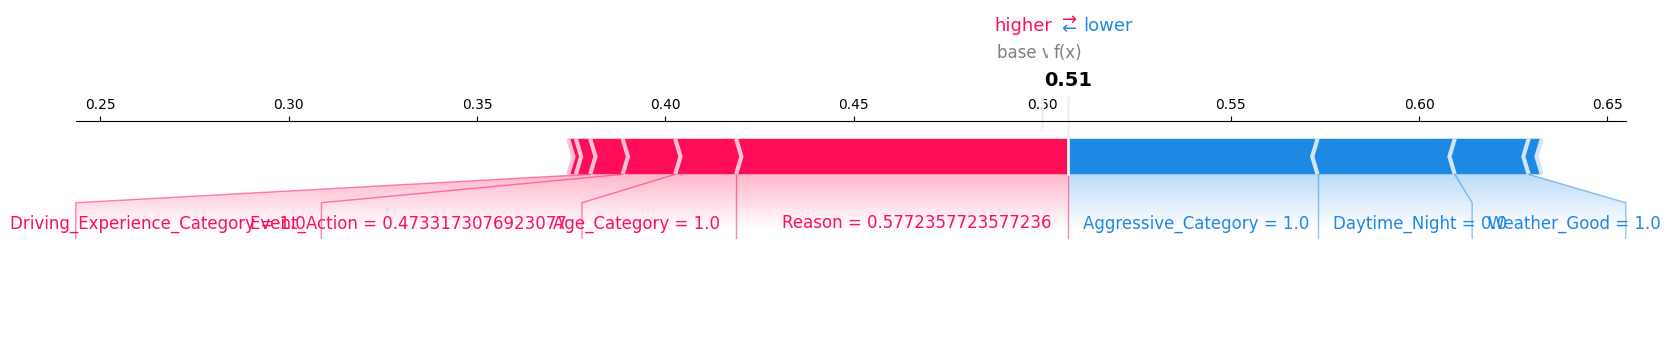

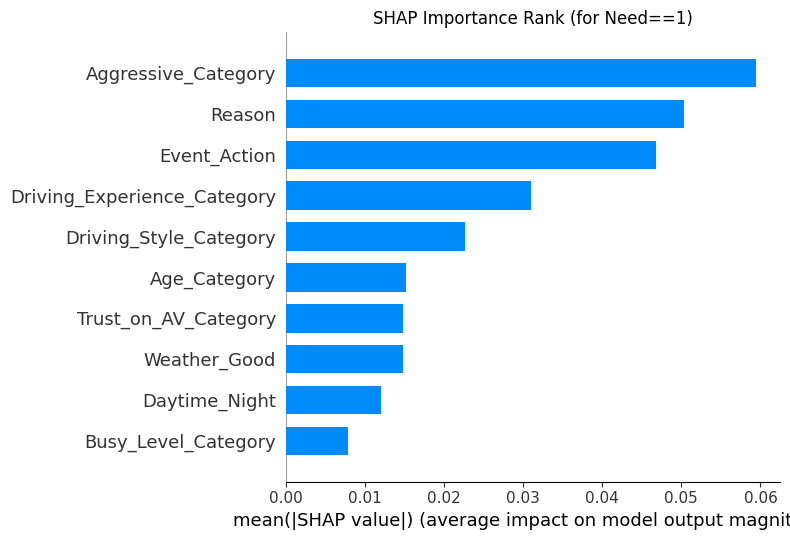

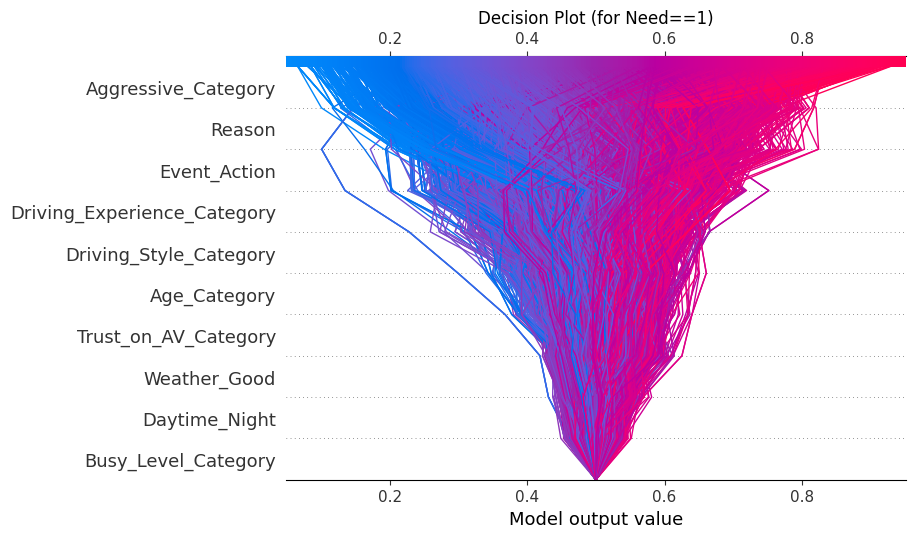

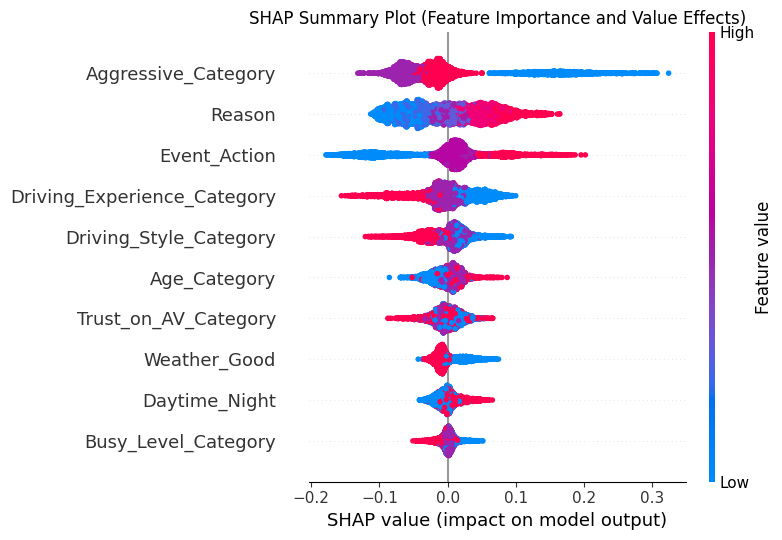

In [ ]:
# === Force Plot ===
sample_index = 0
print(f"Analyzing sample {sample_index} for local explanations")

# Ensure compatibility between base_value and SHAP values
base_value = explainer.expected_value[1]  # Base value for class 1

# Generate Force Plot
shap.force_plot(
    base_value,  # Base value for class 1
    shap_values_class_1_expanded[sample_index, :],  # SHAP values for the sample
    X_selected.iloc[sample_index, :],  # Corresponding feature values
    matplotlib=True
)

# === Other Plots ===
# Global Feature Importance
plt.figure(figsize=(10, 8))
plt.title("SHAP Importance Rank (for Need==1)")
shap.summary_plot(shap_values_class_1_expanded, X_selected, plot_type="bar")

# Decision Plot
plt.figure(figsize=(12, 8))
plt.title("Decision Plot (for Need==1)")
shap.decision_plot(
    base_value,
    shap_values_class_1_expanded,
    X_selected,
    ignore_warnings=True
)

# Summary Dot Plot
plt.figure(figsize=(10, 8))
plt.title("SHAP Summary Plot (Feature Importance and Value Effects)")
shap.summary_plot(shap_values_class_1_expanded, X_selected, plot_type="dot", max_display=20)

Analyzing sample 0 for local explanations


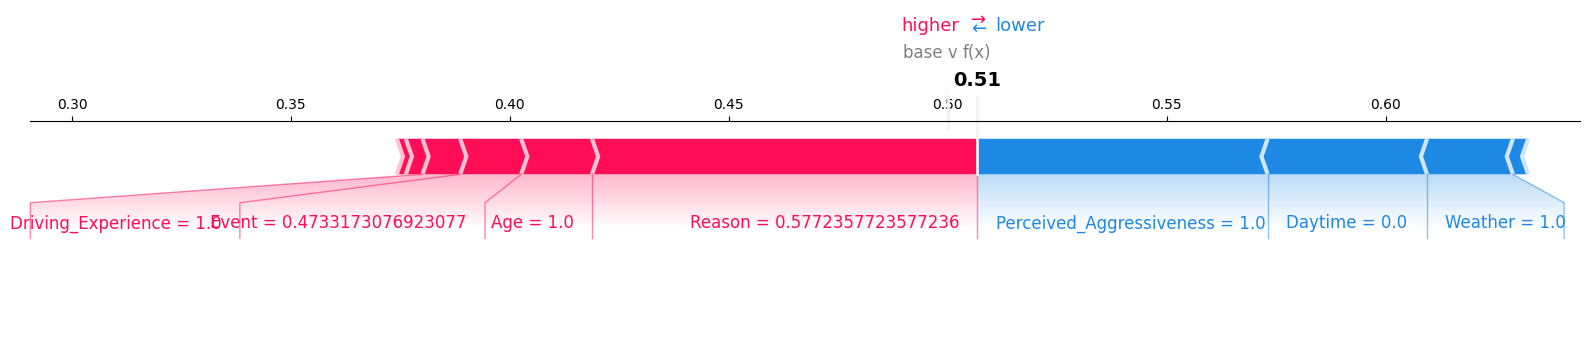

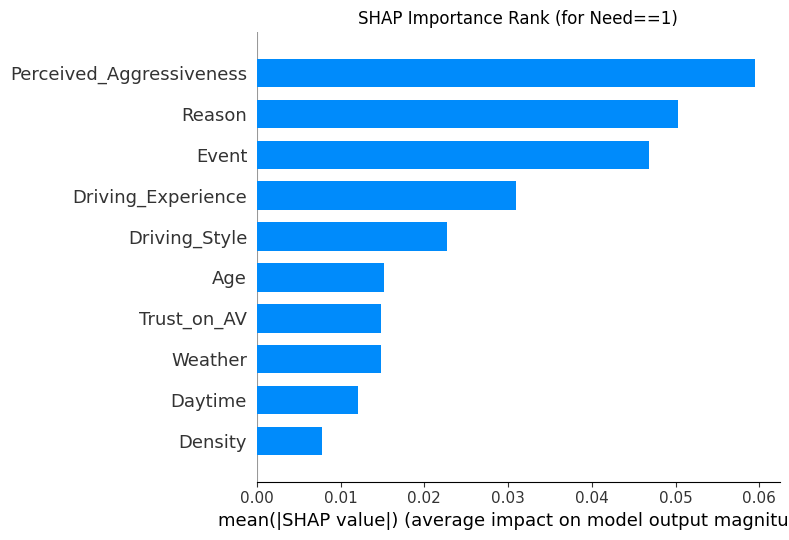

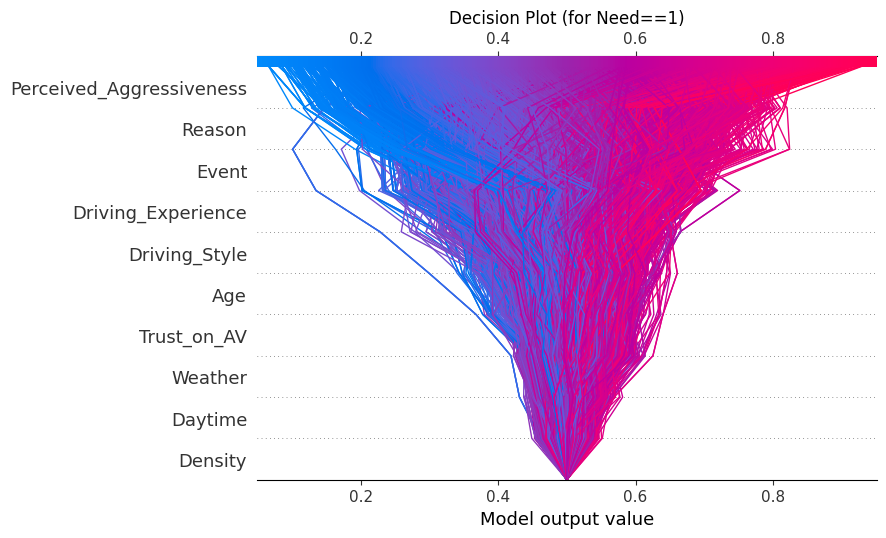

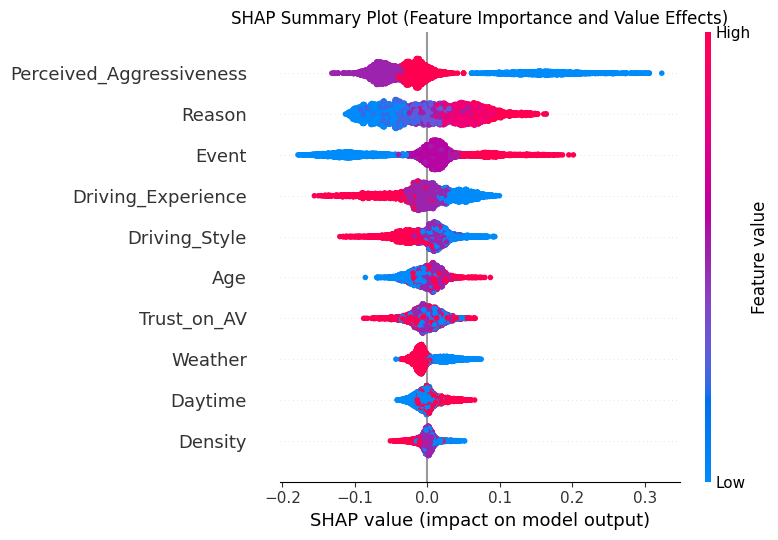

In [ ]:
# === Adjust Feature Names ===
X_selected_adjusted = X_selected.copy()

# 去掉每个 feature 名字最后的 "_" 及其后面的内容
adjusted_feature_names = []
for col in X_selected_adjusted.columns:
    if "_" in col:
        col = "_".join(col.split("_")[:-1])
    # 替换特定的 feature 名称
    if col == "Aggressive":
        col = "Perceived_Aggressiveness"
    elif col == "Busy_Level":
        col = "Density"
    adjusted_feature_names.append(col)

# 更新列名
X_selected_adjusted.columns = adjusted_feature_names

# === Force Plot ===
sample_index = 0
print(f"Analyzing sample {sample_index} for local explanations")

# Ensure compatibility between base_value and SHAP values
base_value = explainer.expected_value[1]  # Base value for class 1

# Generate Force Plot
shap.force_plot(
    base_value,  # Base value for class 1
    shap_values_class_1_expanded[sample_index, :],  # SHAP values for the sample
    X_selected_adjusted.iloc[sample_index, :],  # Corresponding feature values
    matplotlib=True
)

# === Other Plots ===
# Global Feature Importance
plt.figure(figsize=(10, 8))
plt.title("SHAP Importance Rank (for Need==1)")
shap.summary_plot(shap_values_class_1_expanded, X_selected_adjusted, plot_type="bar")

# Decision Plot
plt.figure(figsize=(12, 8))
plt.title("Decision Plot (for Need==1)")
shap.decision_plot(
    base_value,
    shap_values_class_1_expanded,
    X_selected_adjusted,
    ignore_warnings=True
)

# Summary Dot Plot
plt.figure(figsize=(10, 8))
plt.title("SHAP Summary Plot (Feature Importance and Value Effects)")
shap.summary_plot(shap_values_class_1_expanded, X_selected_adjusted, plot_type="dot", max_display=20)


In [ ]:
import pandas as pd

# Check if both data_1 and encoded_data_1 are loaded
if 'data_1' not in locals() or 'encoded_data_1' not in locals():
    raise ValueError("Please ensure both data_1 and encoded_data_1 are loaded.")

# Generate feature mapping
feature_mapping = {}
for col in encoded_data_1.columns:
    if col in data_1.columns:
        feature_mapping[col] = col
    else:
        for original_col in data_1.columns:
            if original_col in col:
                feature_mapping[col] = original_col
                break

# Convert to DataFrame for better readability
feature_mapping_df = pd.DataFrame(list(feature_mapping.items()), columns=["Encoded Feature", "Original Feature"])

# Save and display the mapping table
feature_mapping_df.to_csv("feature_mapping.csv", index=False)
print(feature_mapping_df)


                Encoded Feature             Original Feature
0                  Weather_Good                      Weather
1                 Daytime_Night                      Daytime
2                  Age_Category                 Age_Category
3        Driving_Style_Category       Driving_Style_Category
4          Trust_on_AV_Category         Trust_on_AV_Category
5   Driving_Experience_Category  Driving_Experience_Category
6                 Risk_Category                Risk_Category
7           Aggressive_Category          Aggressive_Category
8           Busy_Level_Category          Busy_Level_Category
9                        Reason                       Reason
10                 Event_Action                 Event_Action


Encoded Feature: Weather_Good -> Original Feature: Weather
Value Mapping: {1: 'Good', 0: 'Bad'}

Encoded Feature: Daytime_Night -> Original Feature: Daytime
Value Mapping: {1: 'Night', 0: 'Day'}

Encoded Feature: Age_Category -> Original Feature: Busy_Level_Category
Value Mapping: {1: 'Low', 0: 'High', 2: 'Medium'}

Encoded Feature: Driving_Style_Category -> Original Feature: Busy_Level_Category
Value Mapping: {0: 'Low', 2: 'High', 1: 'Medium'}

Encoded Feature: Trust_on_AV_Category -> Original Feature: Busy_Level_Category
Value Mapping: {1: 'Low', 2: 'High', 0: 'Medium'}

Encoded Feature: Driving_Experience_Category -> Original Feature: Busy_Level_Category
Value Mapping: {1: 'Low', 2: 'High', 0: 'Medium'}

Encoded Feature: Aggressive_Category -> Original Feature: Busy_Level_Category
Value Mapping: {1: 'Low', 2: 'High', 0: 'Medium'}

Encoded Feature: Busy_Level_Category -> Original Feature: Busy_Level_Category
Value Mapping: {1: 'Low', 0: 'High', 2: 'Medium'}

Encoded Feature: Reason -

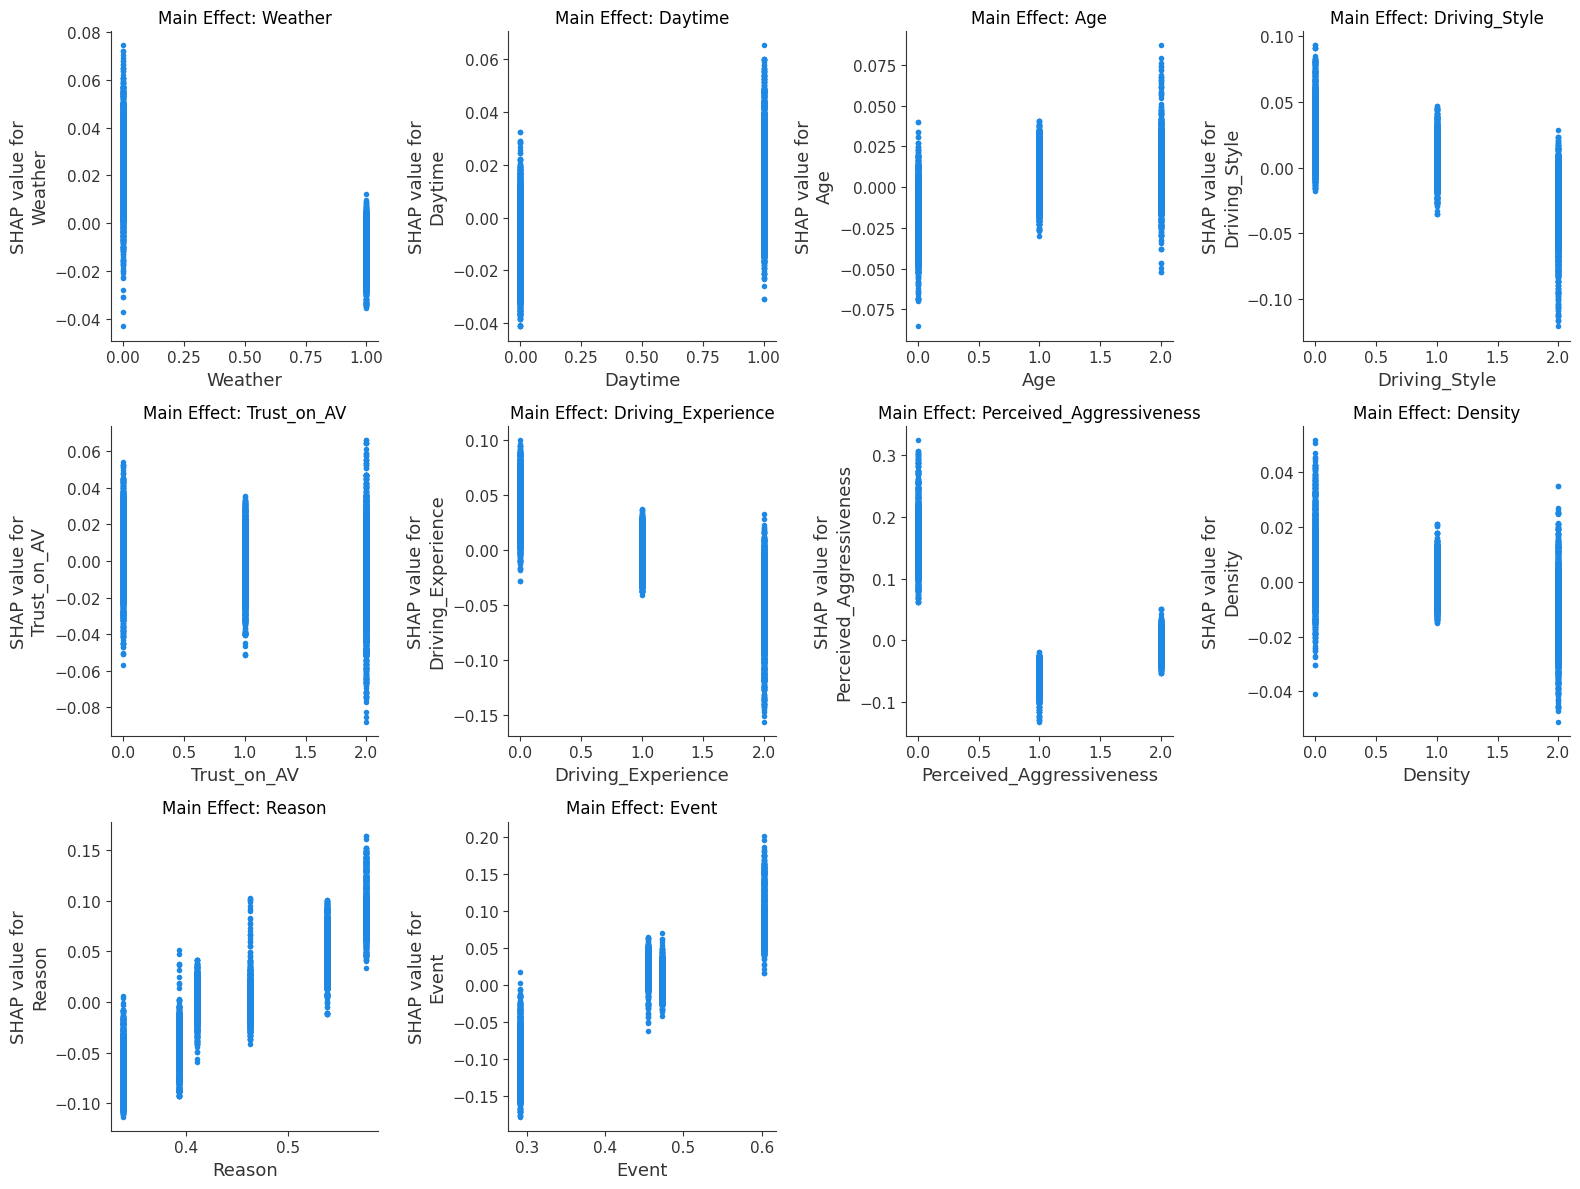

主效应图已生成并保存为 'shap_main_effect_combined_with_weather_daytime_fixed.png'


In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt

# 检查数据是否加载
if 'data_1' not in locals() or 'encoded_data_1' not in locals():
    raise ValueError("请确保 data_1 和 encoded_data_1 已加载。")

# 创建特征值映射
feature_value_mapping = {}

for encoded_col in encoded_data_1.columns:
    for original_col in data_1.columns:
        # 如果唯一值的数量相同，且非空值数量也相等，则认为是对应的列
        if (
            encoded_data_1[encoded_col].nunique() == data_1[original_col].nunique() and
            encoded_data_1[encoded_col].notnull().sum() == data_1[original_col].notnull().sum()
        ):
            # 生成每个值的映射
            mapping = dict(
                zip(
                    encoded_data_1[encoded_col].unique(),
                    data_1[original_col].unique()
                )
            )
            feature_value_mapping[encoded_col] = (original_col, mapping)

# 手动处理特殊情况：Weather_Good 和 Daytime_Night
feature_value_mapping['Weather_Good'] = ('Weather', {1: 'Good', 0: 'Bad'})
feature_value_mapping['Daytime_Night'] = ('Daytime', {1: 'Night', 0: 'Day'})

# 打印映射关系
for encoded_feature, (original_feature, value_mapping) in feature_value_mapping.items():
    print(f"Encoded Feature: {encoded_feature} -> Original Feature: {original_feature}")
    print(f"Value Mapping: {value_mapping}")
    print()

# 将 Encoded Data 的值映射回原始值
X_selected_mapped = X_selected.copy()

# 去掉每个 feature 名字最后的 "_" 及其后面的内容
adjusted_feature_names = []
for col in X_selected_mapped.columns:
    if "_" in col:
        col = "_".join(col.split("_")[:-1])
    # 替换特定的 feature 名称
    if col == "Aggressive":
        col = "Perceived_Aggressiveness"
    elif col == "Busy_Level":
        col = "Density"
    adjusted_feature_names.append(col)

# 更新列名
X_selected_mapped.columns = adjusted_feature_names

'''
for feature in X_selected.columns:
    if feature in feature_value_mapping:
        original_feature, value_mapping = feature_value_mapping[feature]
        X_selected_mapped[feature] = X_selected[feature].map(value_mapping)
        # 重命名特征为原始特征名
        X_selected_mapped.rename(columns={feature: original_feature}, inplace=True)
'''

# 绘制 Main Effect 图
n_features = len(X_selected_mapped.columns)
n_cols = 4
n_rows = (n_features // n_cols) + (1 if n_features % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))

for i, (ax, feature) in enumerate(zip(axes.flatten(), X_selected_mapped.columns)):
    shap.dependence_plot(
        feature,
        shap_values_class_1_expanded,
        X_selected_mapped,
        interaction_index=None,
        ax=ax,
        show=False
    )
    ax.set_title(f"Main Effect: {feature}")

# 删除多余的空白子图
if n_features < n_rows * n_cols:
    for empty_ax in axes.flatten()[n_features:]:
        fig.delaxes(empty_ax)

# 调整布局并保存图像
plt.tight_layout()
plt.savefig("shap_main_effect_combined_with_weather_daytime_fixed.png")
plt.show()

print("主效应图已生成并保存为 'shap_main_effect_combined_with_weather_daytime_fixed.png'")


In [ ]:
ji

NameError: name 'ji' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report

# === 检查数据加载 ===
if 'encoded_data' not in locals() or 'data' not in locals():
    raise ValueError("数据未加载，请检查数据源。")

# 定义 X 和 y
X = encoded_data
y = data['Need']

# === 使用 Boruta 进行特征选择 ===
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
boruta_selector = BorutaPy(rf_model, n_estimators='auto', random_state=42, verbose=2)
boruta_selector.fit(X.values, y.values)

# 提取选中的特征
selected_features = X.columns[boruta_selector.support_].tolist()
print("Selected:", selected_features)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	0
Rejected: 	9


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	0
Rejected: 	9
Selected: []


In [ ]:
# === 定义模型与特征选择方法 ===
models = {
    "RandomForest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

feature_selection_methods = {
    "RFECV": lambda model: RFECV(estimator=model, step=1, cv=5, scoring='f1'),
    "SelectKBest": lambda: SelectKBest(score_func=f_classif)
}

# === 数据准备 ===
X1 = encoded_data_1
X2 = encoded_data_2
y = data['Need']

# === 执行模型训练与评估 ===
results = []

for model_name, model in models.items():
    for fs_name, fs_method in feature_selection_methods.items():
        if fs_name == "SelectKBest":
            param_grid = {
                'feature_selection__k': range(1, X2.shape[1] + 1),
                'classifier__n_estimators': [100, 200],
                'classifier__max_depth': [5, 10]
            }
            pipeline = GridSearchCV(
                estimator=Pipeline([
                    ('feature_selection', fs_method()),
                    ('classifier', model)
                ]),
                param_grid=param_grid,
                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                scoring='f1', n_jobs=-1
            )
            pipeline.fit(X2, y)
            best_model = pipeline.best_estimator_
            selected_features = best_model.named_steps['feature_selection'].get_support(indices=True)
        else:
            selector = fs_method(model)
            selector.fit(X2, y)
            best_model = model.fit(X2.iloc[:, selector.support_], y)
            selected_features = X2.columns[selector.support_].tolist()

        # 模型评估
        y_pred = best_model.predict(X2.iloc[:, selected_features])
        f1 = f1_score(y, y_pred)
        acc = accuracy_score(y, y_pred)
        auc = roc_auc_score(y, best_model.predict_proba(X2.iloc[:, selected_features])[:, 1])

        # 记录结果
        results.append({
            "Model": model_name,
            "Feature_Selection": fs_name,
            "Selected_Features": selected_features,
            "F1_Score": f1,
            "Accuracy": acc,
            "AUC": auc
        })

# === 输出结果 ===
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by="F1_Score", ascending=False)
print(results_df_sorted)


In [ ]:
X_selected = X[selected_features]

# === 定义交叉验证与网格搜索 ===
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 定义交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 网格搜索
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=skf,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# === 训练模型与评估 ===
grid_search.fit(X_selected, y)
best_model = grid_search.best_estimator_
print("最佳参数:", grid_search.best_params_)

# 使用最佳模型预测
y_pred = best_model.predict(X_selected)
y_prob = best_model.predict_proba(X_selected)[:, 1]

# 输出结果
f1 = f1_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)

print("\n模型评估:")
print(f"最优 F1 分数: {f1:.4f}")
print(f"最优 准确率: {accuracy:.4f}")
print(f"最优 AUC: {auc:.4f}")

print("\n分类报告:")
print(classification_report(y, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
最佳参数: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

模型评估:
最优 F1 分数: 0.8127
最优 准确率: 0.8231
最优 AUC: 0.9256

分类报告:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4452
           1       0.77      0.86      0.81      3586

    accuracy                           0.82      8038
   macro avg       0.82      0.83      0.82      8038
weighted avg       0.83      0.82      0.82      8038



SHAP 值类型: <class 'numpy.ndarray'>
SHAP 值形状 (类别 0): (54, 2)
SHAP 值形状 (类别 1): (54, 2)
数据形状: (8038, 54)
提取的类别 1 SHAP 值形状 (展开后): (2, 54)


/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


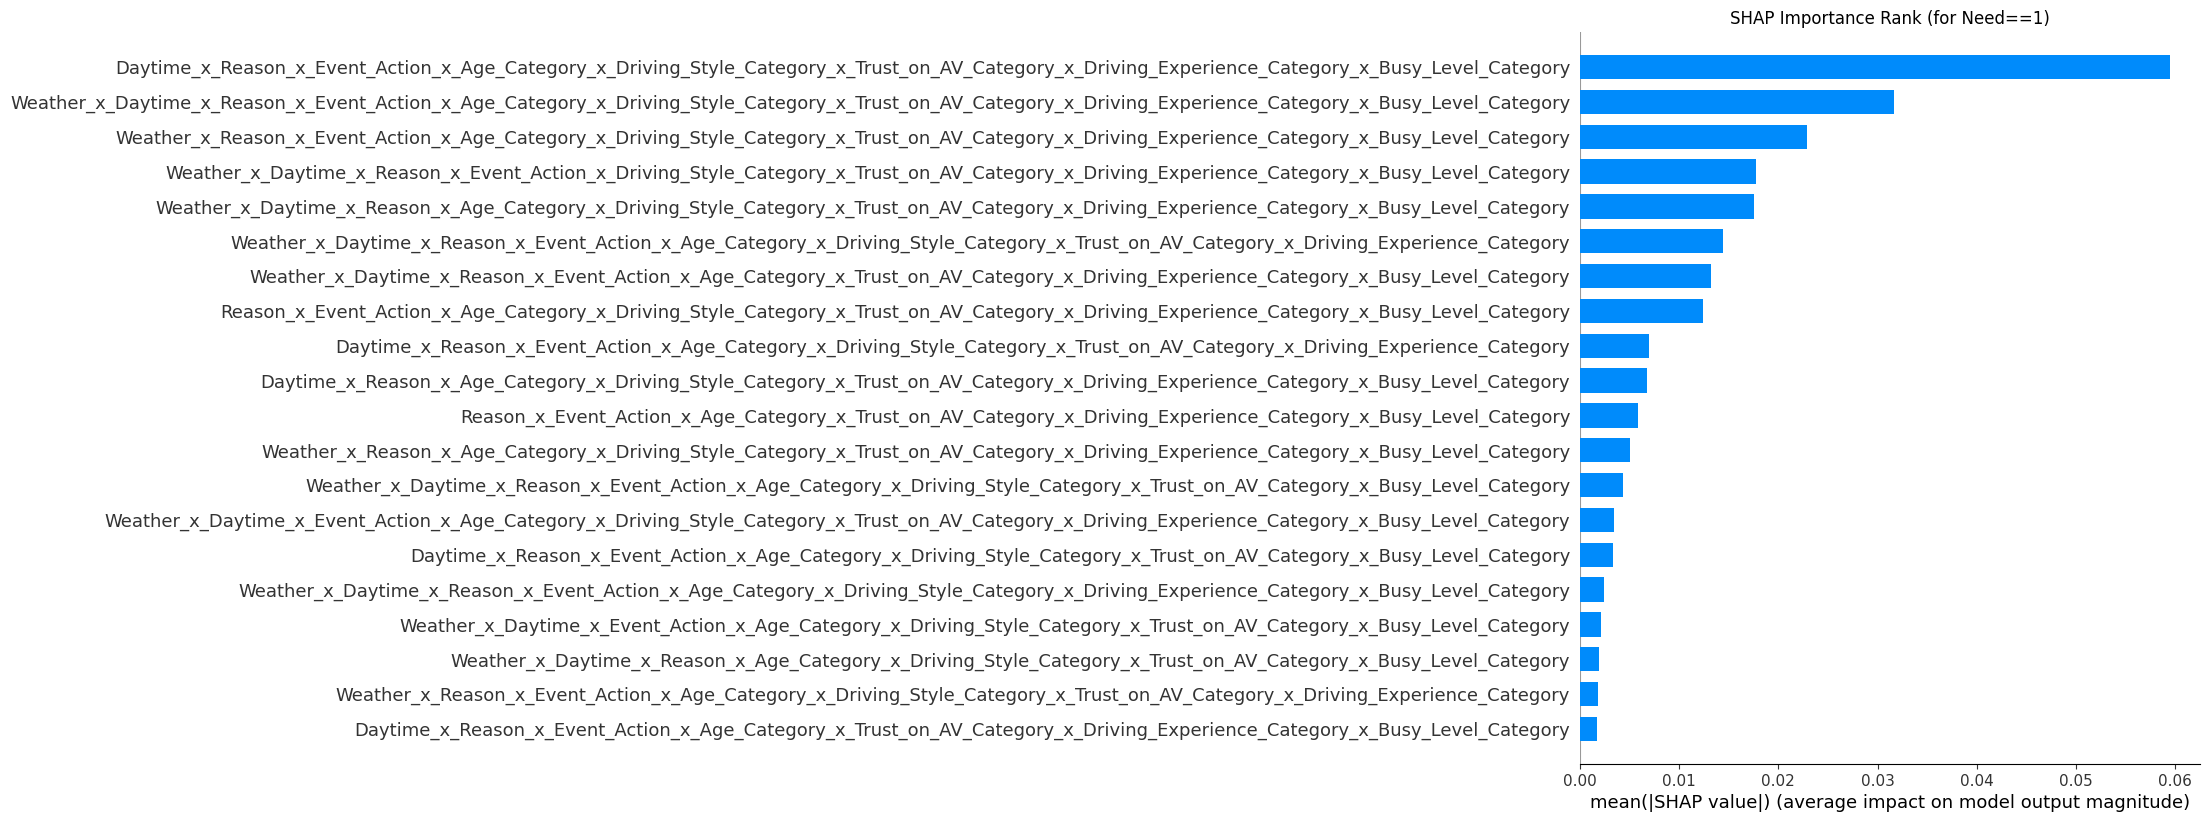

In [ ]:
# === SHAP 分析完整代码 ===
import shap
import matplotlib.pyplot as plt

# 使用训练好的模型和特征数据进行 SHAP 分析
explainer = shap.TreeExplainer(best_model)
shap_values_corrected = explainer.shap_values(X_selected)

# === 检查 SHAP 值和数据形状 ===
print(f"SHAP 值类型: {type(shap_values_corrected)}")
print(f"SHAP 值形状 (类别 0): {shap_values_corrected[0].shape}")
print(f"SHAP 值形状 (类别 1): {shap_values_corrected[1].shape}")
print(f"数据形状: {X_selected.shape}")

# 提取类别 1 的 SHAP 值
# shap_values_corrected 应该按样本数展开，而不是特征数
shap_values_class_1 = shap_values_corrected[1]  # 只用正类的 SHAP 值
shap_values_class_1_expanded = shap_values_class_1.T  # 转置以匹配数据形状

# 检查形状是否匹配
print(f"提取的类别 1 SHAP 值形状 (展开后): {shap_values_class_1_expanded.shape}")

# === 全局重要性排名 ===
plt.figure(figsize=(10, 6))
plt.title("SHAP Importance Rank (for Need==1)")
shap.summary_plot(shap_values_class_1_expanded, X_selected, plot_type="bar")



特征映射 (数字编号 -> 原始名称):
Feature 1: Weather_x_Reason_x_Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category
Feature 2: Weather_x_Event_Action_x_Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category
Feature 3: Daytime_x_Reason_x_Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category
Feature 4: Daytime_x_Reason_x_Age_Category_x_Driving_Style_Category_x_Driving_Experience_Category_x_Busy_Level_Category
Feature 5: Reason_x_Event_Action_x_Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category
Feature 6: Reason_x_Event_Action_x_Age_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category_x_Busy_Level_Category
Feature 7: Reason_x_Event_Action_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category_x_Busy_Level_Category
Feature 8: Reason_x_Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Catego

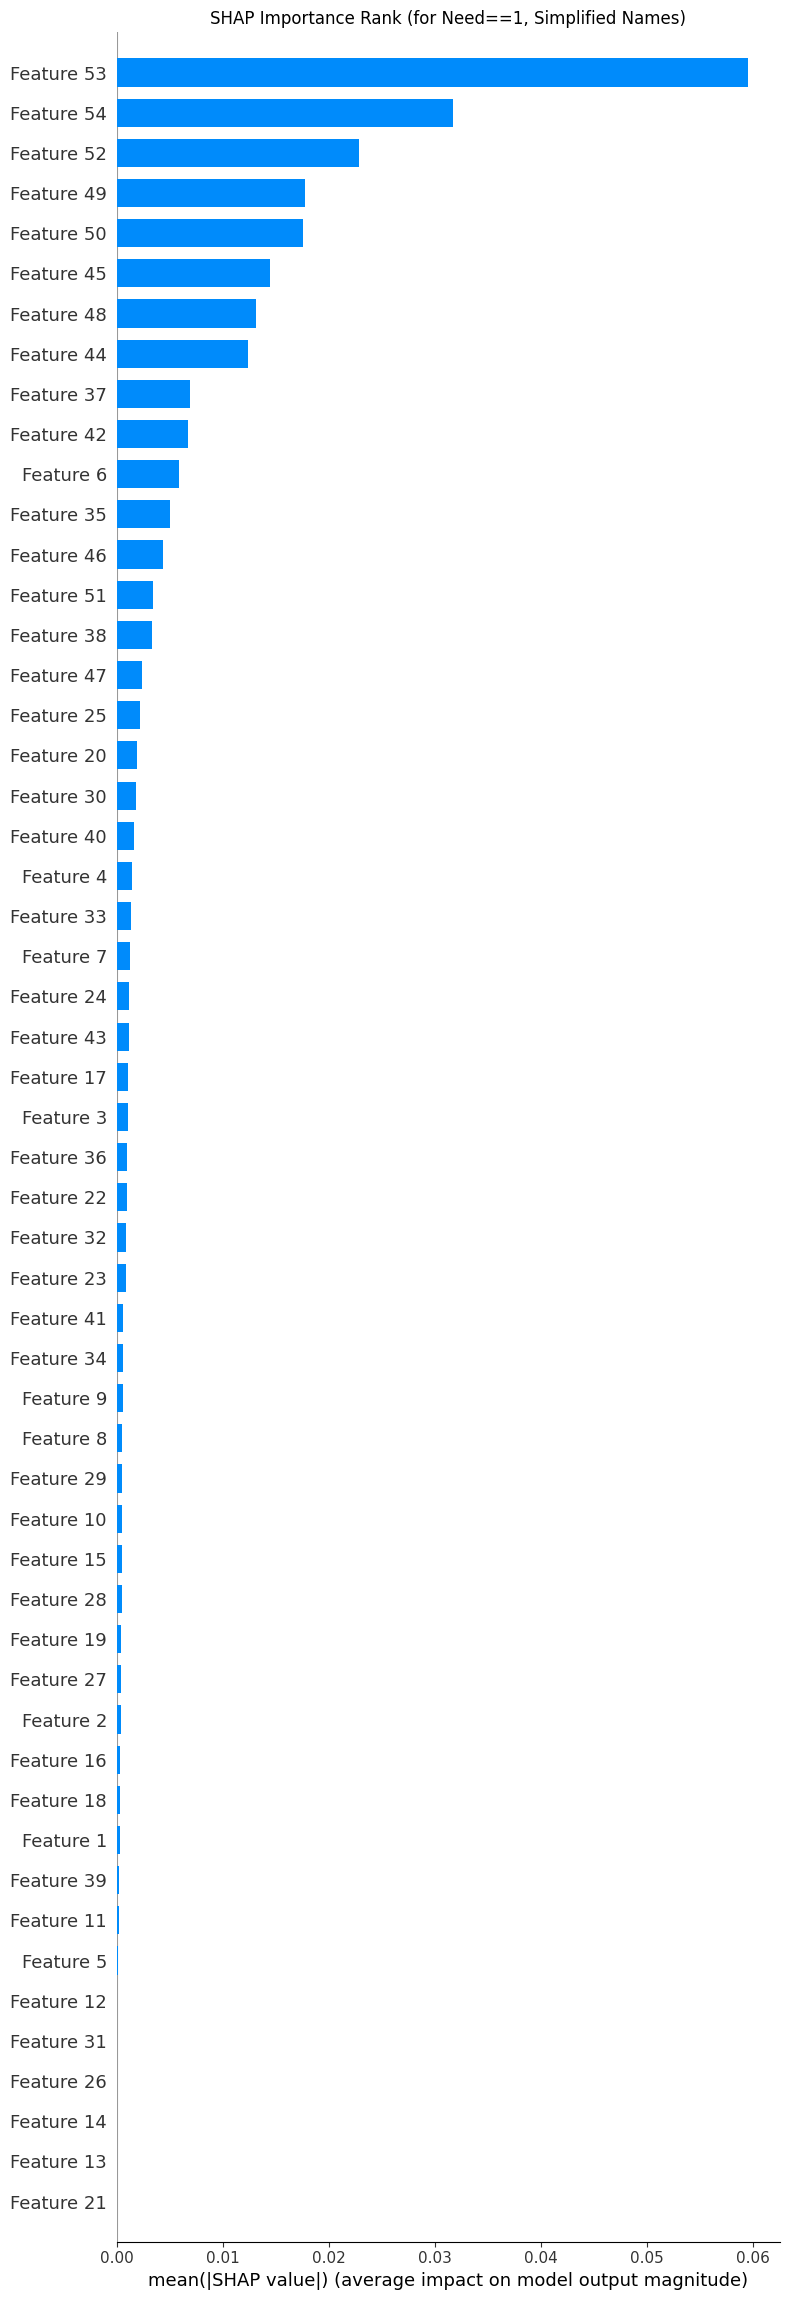

分析样本 0 的局部解释


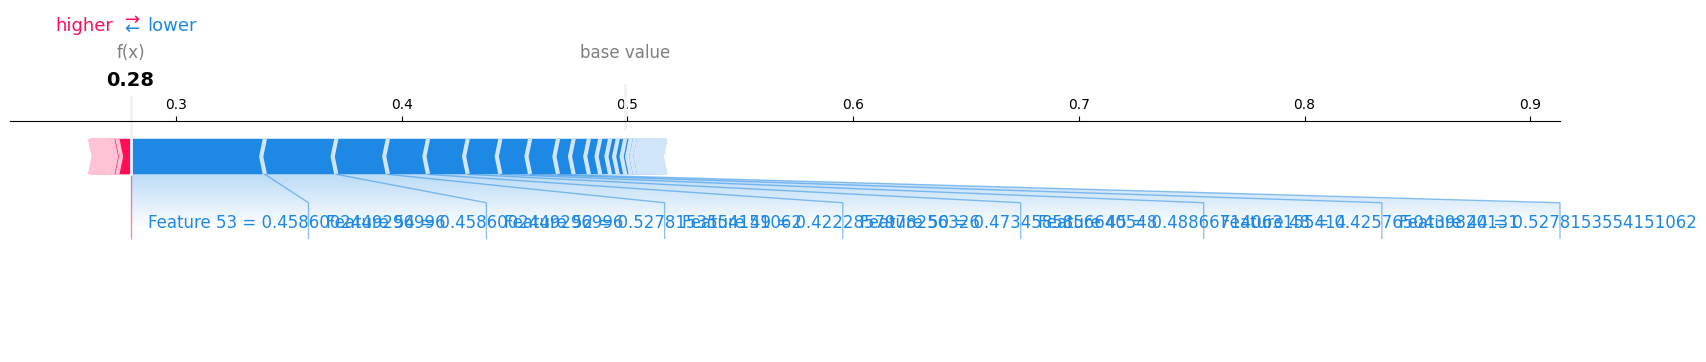

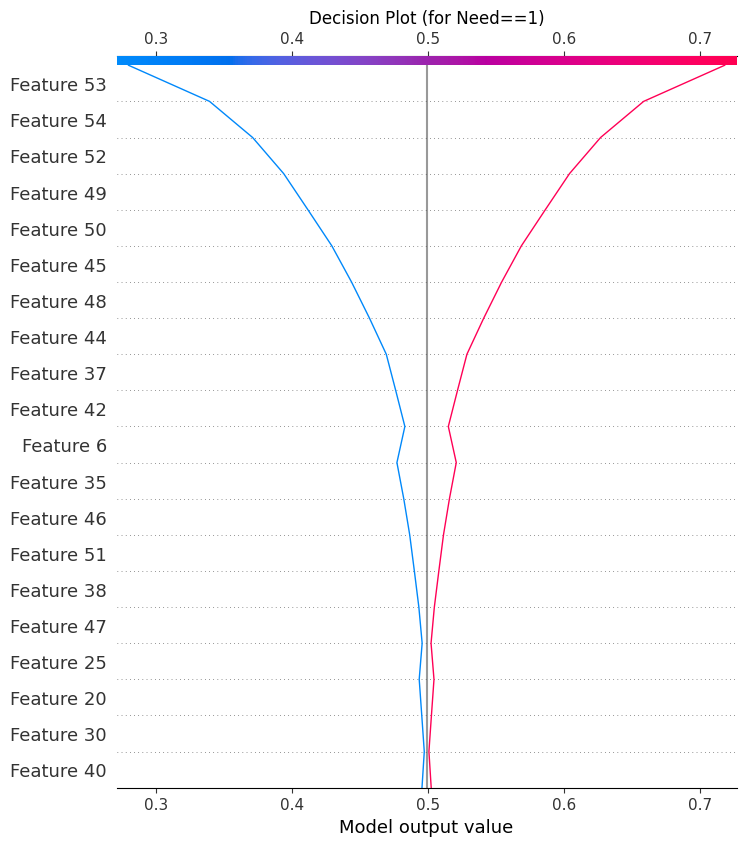

In [ ]:
# === 简化特征名称 ===
feature_mapping = {f"Feature {i+1}": col for i, col in enumerate(X_selected.columns)}
reversed_mapping = {v: k for k, v in feature_mapping.items()}
X_selected_renamed = X_selected.rename(columns=reversed_mapping)

# 打印特征映射
print("特征映射 (数字编号 -> 原始名称):")
for simple_name, original_name in feature_mapping.items():
    print(f"{simple_name}: {original_name}")

# === 全局特征重要性排名 (简化特征名) ===
plt.figure(figsize=(10, 12))
plt.title("SHAP Importance Rank (for Need==1, Simplified Names)")
shap.summary_plot(shap_values_class_1_expanded, X_selected_renamed, plot_type="bar", max_display=54)

# === 局部解释 (Force Plot) ===
sample_index = 0
print(f"分析样本 {sample_index} 的局部解释")

shap.force_plot(
    explainer.expected_value[1],  # 类别 1 的期望值
    shap_values_class_1_expanded[sample_index],  # 样本的 SHAP 值
    X_selected_renamed.iloc[sample_index],  # 样本的特征值
    matplotlib=True
)

# === 决策图 (Decision Plot) ===
plt.figure(figsize=(12, 8))
plt.title("Decision Plot (for Need==1)")
shap.decision_plot(
    explainer.expected_value[1],
    shap_values_class_1_expanded,
    X_selected_renamed
)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
最佳参数: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

模型评估:
最优 F1 分数: 0.5959
最优 准确率: 0.6048
最优 AUC: 0.6523

分类报告:
              precision    recall  f1-score   support

           0       0.67      0.57      0.61      4452
           1       0.55      0.65      0.60      3586

    accuracy                           0.60      8038
   macro avg       0.61      0.61      0.60      8038
weighted avg       0.62      0.60      0.61      8038

选中的特征: ['Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Weather_x_Reason_x_Event_Action_x_Age_Category_x_Driving_Experience_Category', 'Weather_x_Reason_x_Event_Action_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Weather_x_Reason_x_Age_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Weather_x_Reason_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Weather_x_Event_Action_x_Age_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Weather_x_Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Daytime_x_Reason_x_Event_Action_x_Driving_Style_Category_x_Driving_Experience_Category', 'Daytime_x_Reason_x_Event_Action_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Daytime_x_Reason_x_Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category', 'Daytime_x_Reason_x_Age_Category_x_Driving_Style_Category_x_Driving_Experience_Category', 'Daytime_x_Reason_x_Age_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Daytime_x_Reason_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Daytime_x_Event_Action_x_Age_Category_x_Driving_Style_Category_x_Driving_Experience_Category', 'Daytime_x_Event_Action_x_Age_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Daytime_x_Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Reason_x_Event_Action_x_Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category', 'Reason_x_Event_Action_x_Age_Category_x_Driving_Style_Category_x_Driving_Experience_Category', 'Reason_x_Event_Action_x_Age_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Reason_x_Event_Action_x_Age_Category_x_Trust_on_AV_Category_x_Busy_Level_Category', 'Reason_x_Event_Action_x_Age_Category_x_Driving_Experience_Category_x_Busy_Level_Category', 'Reason_x_Event_Action_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Reason_x_Event_Action_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Busy_Level_Category', 'Reason_x_Event_Action_x_Driving_Style_Category_x_Driving_Experience_Category_x_Busy_Level_Category', 'Reason_x_Event_Action_x_Trust_on_AV_Category_x_Driving_Experience_Category_x_Busy_Level_Category', 'Reason_x_Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Reason_x_Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Busy_Level_Category', 'Reason_x_Age_Category_x_Driving_Style_Category_x_Driving_Experience_Category_x_Busy_Level_Category', 'Reason_x_Age_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category_x_Busy_Level_Category', 'Reason_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category_x_Busy_Level_Category', 'Event_Action_x_Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category', 'Event_Action_x_Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Busy_Level_Category', 'Event_Action_x_Age_Category_x_Driving_Style_Category_x_Driving_Experience_Category_x_Busy_Level_Category', 'Event_Action_x_Age_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category_x_Busy_Level_Category', 'Event_Action_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category_x_Busy_Level_Category', 'Age_Category_x_Driving_Style_Category_x_Trust_on_AV_Category_x_Driving_Experience_Category_x_Busy_Level_Category']

Fitting 5 folds for each of 81 candidates, totalling 405 fits
最佳参数: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

模型评估:
最优 F1 分数: 0.6884
最优 准确率: 0.7100
最优 AUC: 0.7791

分类报告:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      4452
           1       0.66      0.72      0.69      3586

    accuracy                           0.71      8038
   macro avg       0.71      0.71      0.71      8038
weighted avg       0.71      0.71      0.71      8038